In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ckay16/accident-detection-from-cctv-footage")

print("Path to dataset files:", path)

100%|██████████| 249M/249M [00:01<00:00, 131MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1


In [ ]:
import os
print(os.listdir(path))

['data']


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory as IMD

batch_size = 32
img_height = 180
img_width = 180
train_ds = IMD(
    f"{path}/data/train",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

val_ds = IMD(
    f"{path}/data/val",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

test_ds = IMD(
    f"{path}/data/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
# Recursively list all directories to find the image folders
for root, dirs, files in os.walk(path):
    if files and any(file.endswith(('.jpg', '.png', '.jpeg')) for file in files):
        print(root)

/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/test/Non Accident
/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/test/Accident
/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/val/Non Accident
/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/val/Accident
/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/train/Non Accident
/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/train/Accident


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ckay16/accident-detection-from-cctv-footage")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory as IMD

batch_size = 32
img_height = 180
img_width = 180

train_ds = IMD(
    f"{path}/data/train",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'  # "accident" & "no accident"
)

val_ds = IMD(
    f"{path}/data/val",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

test_ds = IMD(
    f"{path}/data/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
nomralization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (nomralization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (nomralization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (nomralization_layer(x), y))

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(128, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tf.random.set_seed(42)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.4762 - loss: 1.4220 - val_accuracy: 0.5510 - val_loss: 0.6859
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5916 - loss: 0.6781 - val_accuracy: 0.6531 - val_loss: 0.6201
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.6760 - loss: 0.6139 - val_accuracy: 0.7245 - val_loss: 0.5698
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.7189 - loss: 0.5433 - val_accuracy: 0.7755 - val_loss: 0.5128
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.7530 - loss: 0.4919 - val_accuracy: 0.8469 - val_loss: 0.4382
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.7934 - loss: 0.4290 - val_accuracy: 0.8878 - val_loss: 0.3749
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8455 - loss: 0.3439 - val_accuracy: 0.8469 - val_loss: 0.3693
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8797 - loss: 0.2999 - val_accuracy: 0.8469 - val_loss:

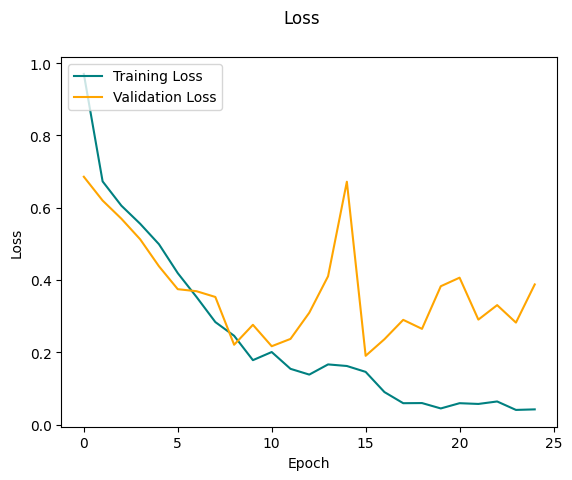

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='Training Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
fig.suptitle('Loss')
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


<ipython-input-17-6579ab1e7175>:44: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-6579ab1e7175>:44: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


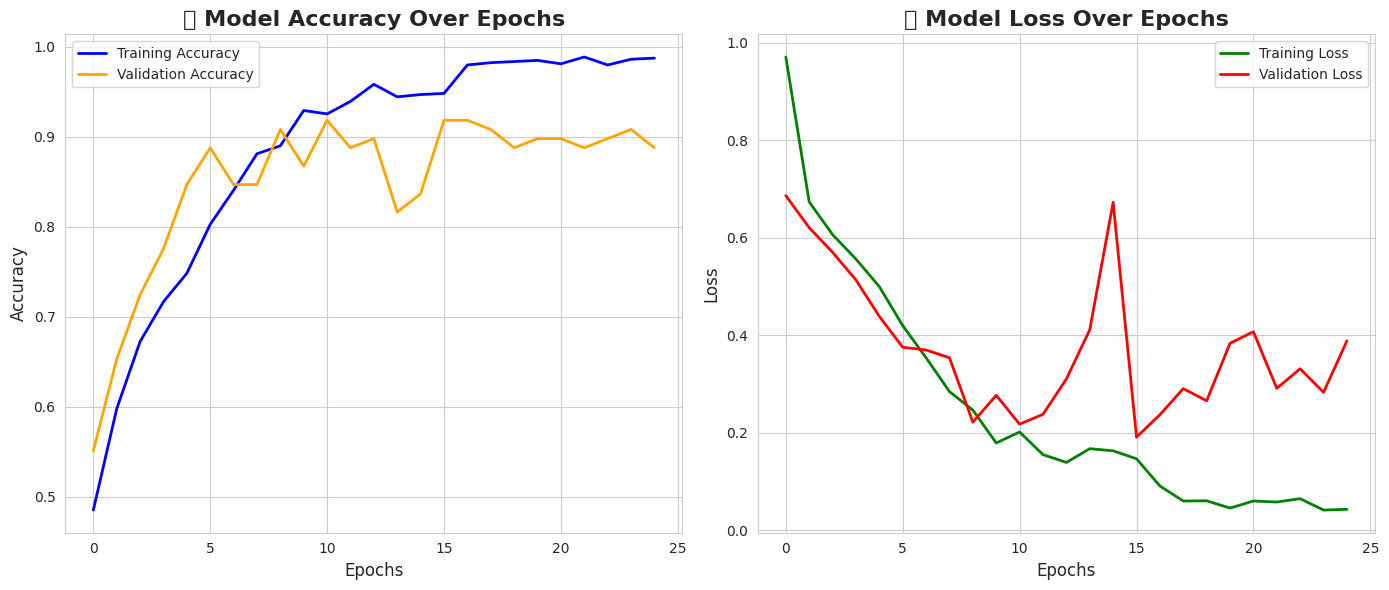

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
sns.lineplot(x=range(len(history.history['accuracy'])),
             y=history.history['accuracy'],
             label='Training Accuracy',
             color='blue',
             linewidth=2, ax=ax[0])

sns.lineplot(x=range(len(history.history['val_accuracy'])),
             y=history.history['val_accuracy'],
             label='Validation Accuracy',
             color='orange',
             linewidth=2, ax=ax[0])

ax[0].set_title('📊 Model Accuracy Over Epochs', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].legend()

# Loss plot
sns.lineplot(x=range(len(history.history['loss'])),
             y=history.history['loss'],
             label='Training Loss',
             color='green',
             linewidth=2, ax=ax[1])

sns.lineplot(x=range(len(history.history['val_loss'])),
             y=history.history['val_loss'],
             label='Validation Loss',
             color='red',
             linewidth=2, ax=ax[1])

ax[1].set_title('📉 Model Loss Over Epochs', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Loss', fontsize=12)
ax[1].legend()

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 628ms/step


<ipython-input-19-2315ef64fc24>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(labels[i].numpy())]


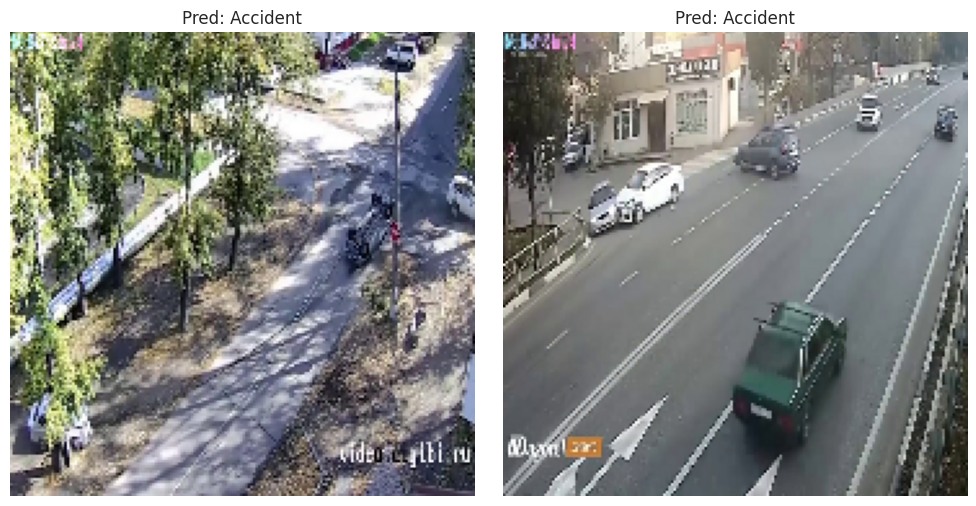

In [ ]:
class_names = ["No Accident", "Accident"]

predictions = model.predict(test_ds)
predicted_labels = ['Accident' if pred > 0.5 else 'No Accident' for pred in predictions.flatten()]

plt.figure(figsize=(10, 5))  # Reduced figure size for 2 images
for images, labels in test_ds.take(1):
    for i in range(min(len(images), 2)):  # Display only 2 images
        ax = plt.subplot(1, 2, i + 1)  # 1 row, 2 columns

        img = images[i].numpy() * 255
        img = img.astype("uint8")

        plt.imshow(img)

        true_label = class_names[int(labels[i].numpy())]
        pred_label = predicted_labels[i]

        plt.title(f"Pred: {pred_label}", fontsize=12)
        plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Save with .keras extension (recommended for newer TensorFlow versions)
!pip install tensorflowjs
import tensorflow as tf
import tensorflowjs as tfjs

# Assuming 'model' is your Keras model
tfjs.converters.save_keras_model(model, 'accident_detection_model_js')
model.save('accident_detection_model.keras')

# OR use .h5 extension
# model.save('accident_detection_model.h5')

# For TensorFlow.js deployment
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'accident_detection_model_js')

ImportError: cannot import name 'float8_e4m3b11fnuz' from 'tensorflow.python.framework.dtypes' (/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/dtypes.py)

In [ ]:
torch.save(model.state_dict(), "vehicle_detection.pth")
from google.colab import files
files.download("vehicle_detection.pth")


NameError: name 'torch' is not defined